<a href="https://colab.research.google.com/github/denisangelo/Federated_Learning/blob/main/Notebooks/Aula_1_PreparacaoAmbiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Instalando a plataforma/bibliotecas e suas dependências
!pip install -q flwr[simulation]
!pip install torch
!pip install torchvision
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# Importando as bibliotecas
import flwr as fl
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
from flwr.common import Metrics
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import CIFAR10

In [15]:
# Definindo o dispositivo de execução
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {DEVICE} using Pytorch{torch.__version__} and Flower{fl.__version__}")

Training on cpu using Pytorch2.0.1+cu118 and Flower1.4.0


In [16]:
# Define o número de clientes a serem realizados no treinamento:
NUM_CLIENTS =4
CLASSES =('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 
BATCH_SIZE= 64

In [17]:
  # Carregando e Normalizando os Dados CIFAR10
  # Definindo as Transformações a serem aplicadas às imagens
def load_data():
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
    )
    trainset = CIFAR10(root="./data", train=True, download=True, transform=transform)
    testset = CIFAR10(root="./data", train=False, download=True, transform=transform)
    partition_size = len(trainset) // NUM_CLIENTS
    lengths = [partition_size] * NUM_CLIENTS
    datasets = random_split(trainset, lengths, torch.Generator().manual_seed(42))
    trainloaders = []
    valloaders = []
    for ds in datasets:
        len_val = len(ds) // NUM_CLIENTS
        len_train = len(ds) - len_val
        lengths =[len_train, len_val]
        ds_train, ds_val = random_split(ds, lengths, torch.Generator().manual_seed(42))
        trainloaders.append(DataLoader(ds_train, batch_size=BATCH_SIZE, shuffle=True,num_workers=2))
        valloaders.append(DataLoader(ds_val, batch_size=BATCH_SIZE, shuffle=False,num_workers=2))
        testloader = DataLoader(testset,batch_size=BATCH_SIZE, shuffle=False,num_workers=2)
    return trainloaders, valloaders, testloader
    
trainloaders, valloaders, testloader = load_data()

Files already downloaded and verified
Files already downloaded and verified


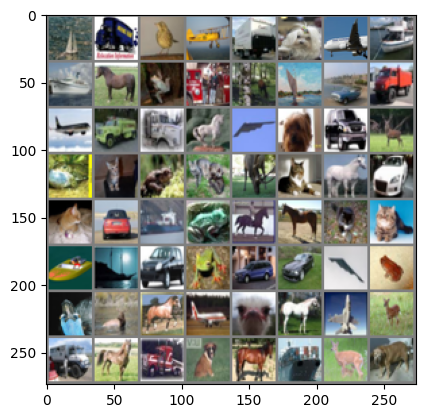

 ship truck  bird plane truck   dog plane  ship  ship horse  frog truck  deer  ship   car truck plane truck truck horse plane   dog   car  deer  frog   cat  frog   cat  deer   cat horse   car


In [18]:
# Analisando o conjunto de imagens/rótulos CIFAR10
def imshow(img):
    img =img/2 + 0.5
    plt.imshow(np.transpose(img.numpy(),(1, 2,0)))
    plt.show()
images, labels =next(iter(trainloaders[0]))
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % CLASSES[labels[j]] for j in range(32)))